# phase 2 insecticide resistance map - PBO?

In [14]:
%run setup.ipynb
%run ../agam-report-base/src/python/ag1k/phase2_ar1.py
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import seaborn as sns

cartopy 0.17.0


In [15]:
df_meta = pd.read_csv('../meta/ag1000g/phase2_samples.meta.txt', sep='\t')
df_meta.columns

Index(['ox_code', 'src_code', 'population', 'country', 'location', 'site',
       'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'ebi_sample_acc', 'latitude', 'longitude'],
      dtype='object')

In [16]:
df_meta

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0051-C,Twifo_Praso__C1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,99910300,33.33,ERS311871,5.60858,-1.54926
3,AA0052-C,Twifo_Praso__F2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,100899280,32.29,ERS311879,5.60858,-1.54926
4,AA0053-C,Twifo_Praso__A4,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,104791234,34.14,ERS311887,5.60858,-1.54926
5,AA0063-C,Twifo_Praso__D1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,90062282,29.33,ERS311872,5.60858,-1.54926
6,AA0064-C,Twifo_Praso__G2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,100028190,31.61,ERS311880,5.60858,-1.54926
7,AA0075-C,Twifo_Praso__F1,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,98566392,31.67,ERS311873,5.60858,-1.54926
8,AA0076-C,Twifo_Praso__B3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,92182496,29.91,ERS311881,5.60858,-1.54926
9,AA0077-C,Twifo_Praso__C4,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,89362286,27.69,ERS311889,5.60858,-1.54926


# map fun

In [17]:
crs_lonlat = ccrs.PlateCarree()
ratios = np.asarray([0.5, 0.5])
sum(ratios)

1.0

## Let's try using the ecosystem layer from phase 1
http://www.aag.org/cs/publications/special/map_african_ecosystems

In [18]:
import humanize
from humanize import naturalsize, intcomma, intword

In [20]:
import os

In [ ]:
#!conda install -c conda-forge gdal

In [24]:
import os
import gdal
import ogr
import osr
import gdalnumeric
import gdalconst

In [25]:
from osgeo import osr, gdal

In [26]:
gdal.__version__

'2.4.1'

In [27]:
#downloaded data from http://rmgsc.cr.usgs.gov/outgoing/ecosystems/AfricaData/
data_dir = '/home/chris/data/Africa_IVC/'

In [28]:
!ls -hal {data_dir}

total 904M
drwxrwxr-x 2 chris chris 4.0K Nov 22 12:52 .
drwxrwxrwx 6 chris chris 4.0K Mar 27 11:40 ..
-rwxrwxrwx 1 chris chris   82 Mar 20  2013 Africa_IVC_20130316_final_MG.tfw
-rwxrwxrwx 1 chris chris 643M Mar 20  2013 Africa_IVC_20130316_final_MG.tif
-rwxrwxrwx 1 chris chris  50K Mar 20  2013 Africa_IVC_20130316_final_MG_tif_arc10_1.lyr
-rwxrwxrwx 1 chris chris  49K Apr  2  2013 Africa_IVC_20130316_final_MG_tif_arc10.lyr
-rwxrwxrwx 1 chris chris  476 Apr  2  2013 Africa_IVC_20130316_final_MG.tif.aux.xml
-rwxrwxrwx 1 chris chris 260M Apr  2  2013 Africa_IVC_20130316_final_MG.tif.ovr
-rw-rw-r-- 1 chris chris  45K Nov 30 15:57 Africa_IVC_20130316_final_MG.tif.vat.csv
-rwxrwxrwx 1 chris chris 393K Mar 20  2013 Africa_IVC_20130316_final_MG.tif.vat.dbf
-rwxrwxrwx 1 chris chris 3.1K Mar 27  2013 Africa_IVC_20130316_final_MG.tif.xml
-rwxrwxrwx 1 chris chris 9.1K Mar 27  2013 Africa_IVC_20130316_final_MG.xml
-rwxrwxrwx 1 chris chris  69K Mar 23  2013 African and Malagasy Veg_Macrogroups_2013

In [29]:
#geoTIFF
dataset = gdal.Open(os.path.join(data_dir, 'Africa_IVC_20130316_final_MG.tif'))

In [30]:
dataset

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbda8c848a0> >

In [31]:
#what spatial reference system has been used?
proj_wkt = dataset.GetProjection()
#wkt = Well Known Text markup language for representing vector geometry on a map.
print(proj_wkt)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [32]:
#conver wkt into spatial reference object
proj = osr.SpatialReference()
proj.ImportFromWkt(proj_wkt)
print(proj)

GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]


In [33]:
#find image boundaries
geo_transform = dataset.GetGeoTransform()
geo_transform
#these numbers define the transformation from pixel raster space to coordinate space.
#of 2 and 4 are zero then image is 'north up'...

(-26.00013888888887,
 0.0008333333333,
 0.0,
 38.00013888888887,
 0.0,
 -0.0008333333332999999)

In [34]:
origin_x = geo_transform[0]
origin_y = geo_transform[3]
pixel_width = geo_transform[1]
pixel_height = geo_transform[5]

In [35]:
origin_x, origin_y

(-26.00013888888887, 38.00013888888887)

#### raster info

In [36]:
# how big?
n_cols = dataset.RasterXSize
n_rows = dataset.RasterYSize
n_cols, n_rows

(108000, 87600)

In [37]:
# how many bands?
dataset.RasterCount

1

In [38]:
band = dataset.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fbda8752300> >

In [39]:
# what data type?
gdal.GetDataTypeName(band.DataType)

'Int32'

In [40]:
#big, too big to fit in memory
humanize.naturalsize(n_cols * n_rows * 4)

'37.8 GB'

#### need a colour table - we have one in ArcGIS.lyr format that is no use, but we can make one from the .dbf file

In [41]:
!dbview {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.dbf --browse --trim --description > \
    {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.csv

In [42]:
!head -n23 {data_dir}/Africa_IVC_20130316_final_MG.tif.vat.csv

Field Name	Type	Length	Decimal Pos
Value     	  N	    9	    0
Count     	  F	   19	   11
hierarchy 	  C	  254	    0
class     	  C	  254	    0
subclass  	  C	  254	    0
formation 	  C	  254	    0
formation 	  C	  254	    0
division k	  C	  254	    0
division c	  C	  254	    0
Division  	  C	  254	    0
Mgkey     	  C	  254	    0
Mg code   	  C	  254	    0
Mg name fi	  C	  254	    0
Macrogroup	  C	  254	    0
Mapped    	  N	    4	    0
Red       	  F	   13	   11
Green     	  F	   13	   11
Blue      	  F	   13	   11
Opacity   	  F	   13	   11
0:2.73051336800e+009:::::::::::::0:0.00000e+000:0.00000e+000:0.00000e+000:1.00000e+000:
1:3.36479726000e+008:1.A.2.Fd:1 Forest to Open Woodland:1.A Tropical Forest:1.A.2:1.A.2 Tropical Lowland Humid Forest:D147:1.A.2.Fd:1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest:MA001:1.A.2.Fd.1:1.A.2.Fd.1-Guineo-Congolian Evergreen Rainforest:Guineo-Congolian Evergreen Rainforest:1:0.00000e+000:4.58824e-001:3.92157e-002:1.00000e+000:
3:3.99018

In [43]:
# extract the field names
vat_fn = os.path.join(data_dir, 'Africa_IVC_20130316_final_MG.tif.vat.csv')
tbl_descr = etl.fromtsv(vat_fn).head(19).convertall('strip')
tbl_descr.displayall()

0|Field Name,1|Type,2|Length,3|Decimal Pos
Value,N,9,0
Count,F,19,11
hierarchy,C,254,0
class,C,254,0
subclass,C,254,0
formation,C,254,0
formation,C,254,0
division k,C,254,0
division c,C,254,0
Division,C,254,0


In [44]:
# extract the data
hdr_colors = tbl_descr.values('Field Name').list()
tbl_colors = (etl
    .fromcsv(vat_fn, delimiter=':')
    .skip(20)  # skip the field descriptions
    .pushheader(hdr_colors)
    .cat()  # remove empty cells beyond columns
    .convert('Value', int)
    .convert(['Count', 'Red', 'Green', 'Blue', 'Opacity'], float)
)
tbl_colors

0|Value,1|Count,2|hierarchy,3|class,4|subclass,5|formation,6|formation,7|division k,8|division c,9|Division,10|Mgkey,11|Mg code,12|Mg name fi,13|Macrogroup,14|Mapped,15|Red,16|Green,17|Blue,18|Opacity
0,2730513368.0,,,,,,,,,,,,,0,0.0,0.0,0.0,1.0
1,336479726.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA001,1.A.2.Fd.1,1.A.2.Fd.1-Guineo-Congolian Evergreen Rainforest,Guineo-Congolian Evergreen Rainforest,1,0.0,0.458824,0.0392157,1.0
3,39901826.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA003,1.A.2.Fd.3,1.A.2.Fd.3-Guineo-Congolian Semi-Deciduous Rainforest,Guineo-Congolian Semi-Deciduous Rainforest,1,0.0666667,0.482353,0.0470588,1.0
4,3666429.0,1.A.2.Fd,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D147,1.A.2.Fd,1.A.2.Fd Guineo-Congolian Evergreen & Semi-Evergreen Rainforest,MA004,1.A.2.Fd.4,1.A.2.Fd.4-Guineo-Congolian Littoral Rainforest,Guineo-Congolian Littoral Rainforest,1,0.027451,0.431373,0.0392157,1.0
5,1398415.0,1.A.2.Fe,1 Forest to Open Woodland,1.A Tropical Forest,1.A.2,1.A.2,D148,1.A.2.Fe,1.A.2.Fe Malagasy Evergreen & Semi-Evergreen Forest,MA005,1.A.2.Fe.5,1.A.2.Fe.5-Madagascar Evergreen Littoral Forest,Madagascar Evergreen Littoral Forest,1,0.054902,0.588235,0.184314,1.0


In [45]:
f = etl.select(tbl_colors, "{Value} == 133")
f

0|Value,1|Count,2|hierarchy,3|class,4|subclass,5|formation,6|formation,7|division k,8|division c,9|Division,10|Mgkey,11|Mg code,12|Mg name fi,13|Macrogroup,14|Mapped,15|Red,16|Green,17|Blue,18|Opacity
133,159826171.0,2.A.1.Fi,2 Shrubland & Grassland,"2.A Tropical Grassland, Savanna & Shrubland",2.A.1,2.A.1,D131,2.A.1.Fi,2.A.1.Fi Sudano-Sahelian Dry Savanna,MA133,2.A.1.Fi.3,2.A.1.Fi.3-Sudano-Sahelian Treed Savanna,Sudano-Sahelian Treed Savanna,1,0.670588,0.803922,0.4,1.0


#### now build matplotlib colour map

In [46]:
max_class = tbl_colors.values('Value').max()
max_class

971

In [47]:
colors = np.zeros((max_class+1, 3), dtype=float)
for i, r, g, b in tbl_colors.cut('Value', 'Red', 'Green', 'Blue').data():
    colors[i] = r, g, b

In [48]:
colors.shape

(972, 3)

In [49]:
# check all numbers processed ok
np.count_nonzero(np.isnan(colors))

0

In [50]:
# fix the zero colour to be white
colors[0] = 1, 1, 1

In [51]:
color_map = mpl.colors.ListedColormap(colors)

#### extract raster data

In [52]:
#load GoTiff into numpy array - too big to load into mem so need to resample
#GDAL allows size of output buffer and resampling algo to be specified at extraction
data = dataset.ReadAsArray(buf_xsize=n_cols//100, buf_ysize=n_rows//100, 
                           resample_alg=gdal.GRIORA_Mode)
data

array([[-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       ...,
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648],
       [-2147483648, -2147483648, -2147483648, ..., -2147483648,
        -2147483648, -2147483648]], dtype=int32)

In [53]:
data.shape

(876, 1080)

In [54]:
#check data is correct before we do any plotting
# set all missing data as 0 class
data[data < 0] = 0

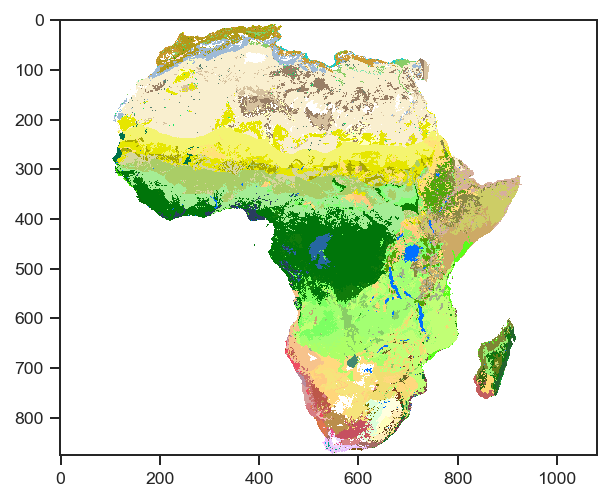

In [55]:
plt.imshow(data, cmap=color_map);

### plot with cartopy

In [56]:
extent_lonlat = (
    origin_x, 
    origin_x + (pixel_width * dataset.RasterXSize),
    origin_y + (pixel_height * dataset.RasterYSize),
    origin_y
)

In [57]:
crs_lonlat = ccrs.PlateCarree()

In [58]:
#level of granularity country
df_meta.country.unique()

array(['Ghana', 'Burkina Faso', 'Uganda', 'Gambia, The', 'Guinea-Bissau',
       'Kenya', 'Cameroon', 'France', 'Equatorial Guinea', 'Angola',
       'Gabon', 'Guinea', "Cote d'Ivoire"], dtype=object)

In [60]:
#get an average lonlat for each country
cy_nm = df_meta.country.unique()
cy_lon = [np.mean(df_meta[df_meta.country == c].longitude.unique()) for c in cy_nm]
cy_lat = [np.mean(df_meta[df_meta.country == c].latitude.unique()) for c in cy_nm]

#get the number of samples in each pop
cy_num = [df_meta[df_meta.country == c].shape[0] for c in cy_nm]

### insecticide resistance loci
- for each sample kdr/cyp/both/none

In [64]:
#eric's cyp data
df_c6 = pd.read_csv("../data/cyp6aap.csv", sep="\t")
df_c9 = pd.read_csv("../data/cyp9k1.csv", sep="\t")
df_c9.head()

,Unnamed: 0,Dup0,Dup1,Dup2,Dup3,Dup4,Dup5,Dup6,Dup7,Dup8,Dup9,Dup10,Dup11,Dup12,Dup13,Dup14,Dup15,Dup16,Any
0,AA0040_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AA0041_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AA0042_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AA0043_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AA0044_C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
#kdr data from genotypes F/S per indiv
#L1014F  SNP     2L      2422652
#L1014S  SNP     2L      2422651
callset = phase2_ar1.callset_pass_biallelic
gen = allel.GenotypeDaskArray(callset['2L']['calldata/genotype'])
pos = allel.SortedIndex(callset['2L']['variants']['POS'][:])

In [78]:
F = gen[pos.locate_range(2422652, 2422652)]
S = gen[pos.locate_range(2422651, 2422651)]

In [82]:
np.asarray(S)

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=int8)

In [ ]:
#then get pop freqs

In [67]:
list(calldata['2L'].keys())

['calldata', 'variants']

In [70]:
gen

<zarr.core.Array '/2L/calldata/genotype' (8906423, 1142, 2) int8 read-only>

In [ ]:


#add counts of gambiae/coluzzi/other columns

m = []
s = []
u = []

for c in cy_nm:
    c_df = df_meta[df_meta.country == c]
    m.append(len(c_df[c_df['m_s'] == 'M']))
    s.append(len(c_df[(c_df['m_s'] == 'S') | (c_df['m_s'] == 'M/S')]))
    u.append(len(c_df[(c_df['m_s'] != 'M') & (c_df['m_s'] != 'S') & (c_df['m_s'] != 'M/S')]))

#add long names for legend.
long_nm = ['Ghana', 'Burkina Faso', 'Uganda', 'Gambia', 'Guinea Bissau', 'Kenya', 'Cameroon', 'Mayotte island',
           'Bioko island', 'Angola', 'Gabon', 'Guinea', "Cote d'Ivoire"]

In [ ]:
#make data frame for ease of adjusting offsets
df = pd.DataFrame()
df['pop'] = cy_nm
df['lon'] = cy_lon 
df['lat'] = cy_lat
df['num'] = cy_num
df['m'] = m
df['s'] = s
df['u'] = u
df['long'] = long_nm
df

In [ ]:
#make lonlat offsets, label position exceptions 
df['offset_lon'] = np.zeros(len(df))
df['offset_lat'] = np.zeros(len(df))
df['label'] = 'top'

#ghana
df.loc[df['pop'] == 'Ghana', 'offset_lat'] = -3
df.loc[df['pop'] == 'Ghana', 'offset_lon'] = 0
#BF
df.loc[df['pop'] == 'Burkina Faso', 'offset_lat'] = 3
df.loc[df['pop'] == 'Burkina Faso', 'offset_lon'] = 2
df.loc[df['pop'] == 'Burkina Faso', 'label'] = 'bottom'
#Uganda
df.loc[df['pop'] == 'Uganda', 'offset_lat'] = 3
df.loc[df['pop'] == 'Uganda', 'offset_lon'] = 0
df.loc[df['pop'] == 'Uganda', 'label'] = 'bottom'
#Gambia
df.loc[df['pop'] == 'Gambia, The', 'offset_lat'] = 1
df.loc[df['pop'] == 'Gambia, The', 'offset_lon'] = -3
df.loc[df['pop'] == 'Gambia, The', 'label'] = 'bottom'
#GB
df.loc[df['pop'] == 'Guinea-Bissau', 'offset_lat'] = -2
df.loc[df['pop'] == 'Guinea-Bissau', 'offset_lon'] = -2
#Kenya
df.loc[df['pop'] == 'Kenya', 'offset_lat'] = -1
df.loc[df['pop'] == 'Kenya', 'offset_lon'] = 2
df.loc[df['pop'] == 'Kenya', 'label'] = 'bottom'
#Cam
df.loc[df['pop'] == 'Cameroon', 'offset_lat'] = 3
df.loc[df['pop'] == 'Cameroon', 'offset_lon'] = 3
df.loc[df['pop'] == 'Cameroon', 'label'] = 'bottom'
#mayotte
df.loc[df['pop'] == 'France', 'offset_lat'] = 2
df.loc[df['pop'] == 'France', 'offset_lon'] = -1
df.loc[df['pop'] == 'France', 'label'] = 'bottom'
#Equatorial Guinea
df.loc[df['pop'] == 'Equatorial Guinea', 'offset_lat'] = -1
df.loc[df['pop'] == 'Equatorial Guinea', 'offset_lon'] = -2
#df.loc[df['pop'] == 'Equatorial Guinea', 'label'] = 'bottom'
#Angola
df.loc[df['pop'] == 'Angola', 'offset_lat'] = 0
df.loc[df['pop'] == 'Angola', 'offset_lon'] = -3
#Gabon
# df.loc[df['pop'] == 'Gabon', 'offset_lat'] = -1.5
# df.loc[df['pop'] == 'Gabon', 'offset_lon'] = 3
df.loc[df['pop'] == 'Gabon', 'offset_lat'] = -2
df.loc[df['pop'] == 'Gabon', 'offset_lon'] = -2.5
#Guinea
df.loc[df['pop'] == 'Guinea', 'offset_lat'] = 2
df.loc[df['pop'] == 'Guinea', 'offset_lon'] = -1
df.loc[df['pop'] == 'Guinea', 'label'] = 'bottom'
#Guinea
df.loc[df['pop'] == 'Guinea', 'offset_lat'] = 2
df.loc[df['pop'] == 'Guinea', 'offset_lon'] = -1
#Cote
df.loc[df['pop'] == "Cote d'Ivoire", 'offset_lat'] = 2
df.loc[df['pop'] == "Cote d'Ivoire", 'offset_lon'] = 0
df.loc[df['pop'] == "Cote d'Ivoire", 'label'] = 'bottom'

In [ ]:
df

In [ ]:
sp_lab = ['s', 'm', 'u']
sp_nm = ['$Anopheles$ $gambiae$', '$Anopheles$ $coluzzii$', 'unknown']
#palette
flat = ["#3498db", "#e74c3c", "#95a5a6"]
palette = sns.color_palette(flat, n_colors=len(sp_nm))
# add a colour for other_resistant
sns.palplot(palette)
plt.gca().set_xticklabels(sp_nm);

In [ ]:
# for legend
sp_colors = {l: c for l, c in zip(sp_nm, palette)}
sp_colors

In [ ]:
def plot_shiny_map(fn=None, dpi=150):
    subplot_kw = dict(projection=crs_lonlat)
    fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=subplot_kw)
    ax.set_extent(extent_lonlat, crs=crs_lonlat)
    ax.imshow(data, cmap=color_map, extent=extent_lonlat, origin='upper')
    ax.coastlines(resolution='50m', linewidth=1.5, zorder=1)
    ax.add_feature(cfeature.BORDERS, linewidth=1.5, zorder=4)
    
    
    
        #add pies
    for _, row in df.iterrows():
        ratios = np.asarray([row[k]/row.num for k in sp_lab])
        ratios = np.append(ratios, 1 - np.sum(ratios))
       
        # wedgeprops is used here just to pass the zorder command
        centre = (row.lon + row.offset_lon, row.lat + row.offset_lat)
        radius = np.sqrt(row.num * .02)
        
        ax.pie(ratios, wedgeprops=dict(zorder=7), colors=palette, center=centre, radius=radius, shadow=True)
        ax.add_patch(plt.Circle(xy=centre, radius=radius, facecolor='none', edgecolor='k', zorder=8, lw=2.5))
        
        lbl = row.long
        if row.label == 'bottom':
            ax.text(centre[0], centre[1] + (radius + (0.1 * radius)), lbl, ha='center', va='bottom', fontsize=14, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)
        if row.label == 'top':
            ax.text(centre[0], centre[1] - (radius + (0.1 * radius)), lbl, ha='center', va='top', fontsize=14, fontweight='bold', bbox=dict(edgecolor='w', facecolor='w', pad=1, alpha=.8, ), zorder=6)
   
        if row.offset_lat != 0 or row.offset_lon != 0:
            ax.plot([row.lon, row.lon + row.offset_lon],[row.lat, row.lat + row.offset_lat], 'k-', lw=2.5, zorder=5)
    
    #manual colour legend
    plt.text(-14.5,-0.3, 'Species', fontsize=16,fontweight='bold')
    plt.plot([-16.5, -19.6],[-2, -2], color=sp_colors['$Anopheles$ $gambiae$'], lw=10, zorder=20)
    plt.text(-15,-2.3, '$Anopheles$ $gambiae$', fontsize=15 )
    plt.plot([-16.5, -19.6],[-4, -4], color=sp_colors['$Anopheles$ $coluzzii$'], lw=10, zorder=20)
    plt.text(-15,-4.3, '$Anopheles$ $coluzzii$', fontsize=15 )
    plt.plot([-16.5, -19.6],[-6, -6], color=sp_colors['unknown'], lw=10, zorder=20)
    plt.text(-15,-6.3, 'unknown', fontsize=15 )
    plt.text(-16.5,-9.3, '   Sample size', fontsize=16,fontweight='bold')
    
    #cover tiny island
    plt.plot([-20, -10],[-7.8, -7.8], 'w', lw=20, zorder=20)
    ax.set_extent([-22, 48, -12, 15])


    #size legend
    l1 = Line2D([], [], marker = 'o', markersize=25, markerfacecolor='k',  color='w') 
    l2 = Line2D([], [], marker = 'o', markersize=35, markerfacecolor='k',  color='w') 
    l3 = Line2D([], [], marker = 'o', markersize=50, markerfacecolor='k',  color='w')
    labelz = ["n=25", " n=50", "   n=100"]   
    leg = ax.legend([l1, l2, l3], labelz, ncol=3, frameon=False, fontsize=15,handlelength=2, loc = 3,
                     borderpad = 1.8, handletextpad=0.3, bbox_to_anchor=(-0.01, 0.0))
    
    
#     leg = ax.legend(handles=legend_elements, , loc='upper left', title='Species', ncol=1, fontsize=15 )
#     leg.get_title().set_fontsize('16')
#     leg.get_title().set_fontweight('bold')
#     leg._legend_box.align = "center"
                 

    if fn:
        fig.savefig(fn, jpeg_quality=100, dpi=dpi, bbox_inches='tight');

In [ ]:
plot_shiny_map(fn='../artwork/collection_site_map.jpg')